# Credit Card Approval Prediction - Exploratory Data Analysis

In [1]:
# Installing necessary Libraries that are essential 
# !pip install pandas 
# !pip install numpy 
# !pip install matplotlib 
# !pip install searborn 
# !pip install math 
# !pip install warnings 
# !pip install autoviz
# !pip install scikit-learn 
# !pip install scipy 
# !pip install itertools
# !pip install xgboost
# !pip install imblearn 
# !pip install keras
# !pip install tensorflow
# !pip install imbalanced-learn

# Importing necessary Libraries that are essential for the EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
import itertools
import statsmodels.api as sm
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import time
from datetime import datetime
from IPython.display import Image, display
from sklearn import tree

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


### Application Records Dataset EDA

In [2]:
# Loading the Application Records dataset and displaying first few records of it
data = pd.read_csv('application_record.csv')
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
# Shape of the Dataset (Rows * Columns)
data.shape

(438557, 18)

In [4]:
# Were there outliers or suspicious data?
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [5]:
# Total Number of Null Values in each Column
data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [6]:
# Is there any NULL Values in the columns
data.isnull().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE         True
CNT_FAM_MEMBERS        False
dtype: bool

In [7]:
# Head of the missing column
data.loc[:5,data.isnull().any()]

,OCCUPATION_TYPE
0,NaN
1,NaN
2,Security staff
3,Sales staff
4,Sales staff
5,Sales staff


In [8]:
# Checking for Duplicate Records
data[data.duplicated()]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS


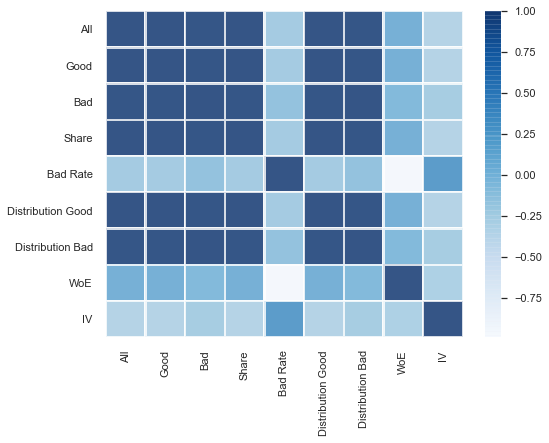

In [107]:
# Correlation Plot
sns.set()
corr = data.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr, xticklabels = corr.columns.values, 
            yticklabels = corr.columns.values,
            cmap = "Blues", linewidths = 1.25, alpha = 0.8
           )
plt.show()

In [10]:
# Evaluating Gender Proportions
eval_Gender = data["CODE_GENDER"].value_counts(normalize = True)
eval_Gender

F    0.671384
M    0.328616
Name: CODE_GENDER, dtype: float64

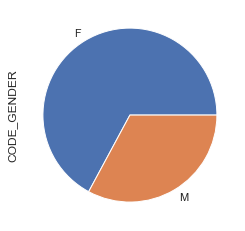

In [108]:
# Visualizing Gender Evaluation on a Pie Chart
eval_Gender.plot.pie()
plt.show()

In [12]:
# Evaluating Housing Types Proportions
eval_Housing_Type = data["NAME_HOUSING_TYPE"].value_counts(normalize = True)
eval_Housing_Type

House / apartment      0.898016
With parents           0.043499
Municipal apartment    0.032411
Rented apartment       0.013622
Office apartment       0.008943
Co-op apartment        0.003509
Name: NAME_HOUSING_TYPE, dtype: float64

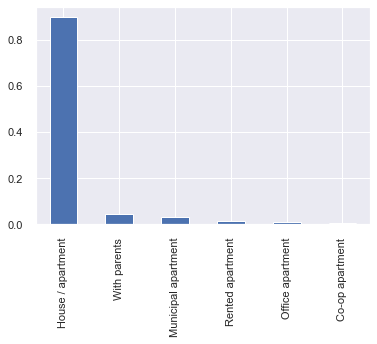

In [109]:
# Visualizing the Housing Type Evalution Metrics
eval_Housing_Type.plot.bar()
plt.show()

In [14]:
# House Ownership Proportions By Gender Type
housing_Owners = data.groupby(['CODE_GENDER','NAME_HOUSING_TYPE']).agg({'ID': 'count'})
housing_Owners

ID
CODE_GENDER NAME_HOUSING_TYPE          
F           Co-op apartment         862
            House / apartment    267607
            Municipal apartment   10019
            Office apartment       2122
            Rented apartment       3284
            With parents          10546
M           Co-op apartment         677
            House / apartment    126224
            Municipal apartment    4195
            Office apartment       1800
            Rented apartment       2690
            With parents           8531

In [15]:
# Housing Ownership Percentages
housing_Owner_Percent = housing_Owners.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
housing_Owner_Percent

ID
CODE_GENDER NAME_HOUSING_TYPE             
F           Co-op apartment       0.292759
            House / apartment    90.886768
            Municipal apartment   3.402731
            Office apartment      0.720690
            Rented apartment      1.115338
            With parents          3.581714
M           Co-op apartment       0.469757
            House / apartment    87.584393
            Municipal apartment   2.910829
            Office apartment      1.248985
            Rented apartment      1.866539
            With parents          5.919496

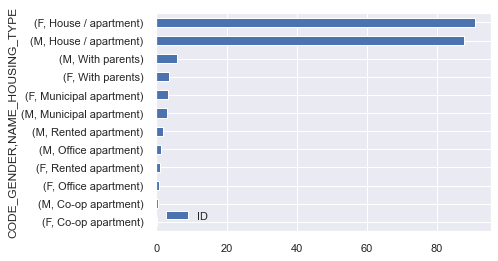

In [110]:
# Visualizing Housing Ownership Percentages By Gender on a Horizontal Bar Graph
housing_Owner_Percent.sort_values(by = 'ID').plot.barh()
plt.show()

In [111]:
# Relation between Education and Income
data.groupby(["NAME_EDUCATION_TYPE"])["AMT_INCOME_TOTAL"].mean().sort_values(ascending=False).plot.barh()
plt.show()

KeyError: 'NAME_EDUCATION_TYPE'

In [18]:
# Mean & Median of the Amount Income 
print(data["AMT_INCOME_TOTAL"].mean())
print(data["AMT_INCOME_TOTAL"].median())

187524.28600950394
160780.5


### Credit Records Dataset EDA

In [19]:
# Loading the Credit Record dataset and displaying first few records of it
crData = pd.read_csv("credit_record.csv")
crData.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [20]:
# Shape of the Dataset (Rows * Columns)
crData.shape

(1048575, 3)

In [21]:
# Information of the Data Types in this Dataset
crData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
ID                1048575 non-null int64
MONTHS_BALANCE    1048575 non-null int64
STATUS            1048575 non-null object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [22]:
# Descriptive Statistics of the Numerical Variables
crData.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


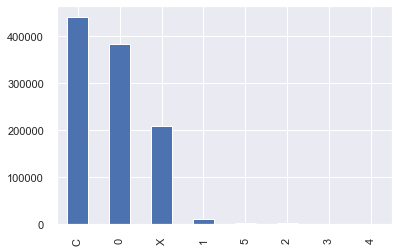

In [112]:
# Visualizing the Count of Status Types 
crData["STATUS"].value_counts().plot.bar()
plt.show()

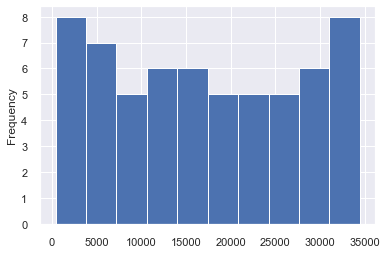

In [113]:
# Visualizing the Frequency Distribution of Months Balance 
crData["MONTHS_BALANCE"].value_counts().plot.hist()
plt.show()

In [114]:
plt.rcParams['figure.facecolor'] = 'white'

Shape of your Data Set: (438557, 18)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  1
    18 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3


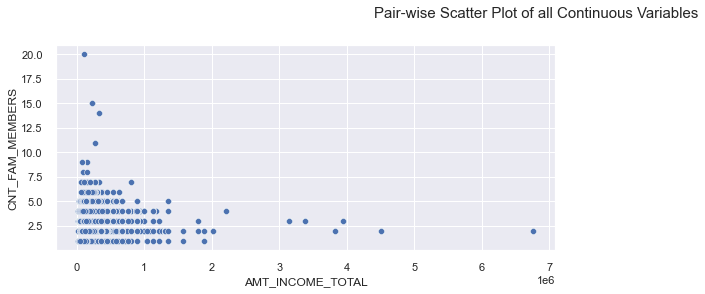

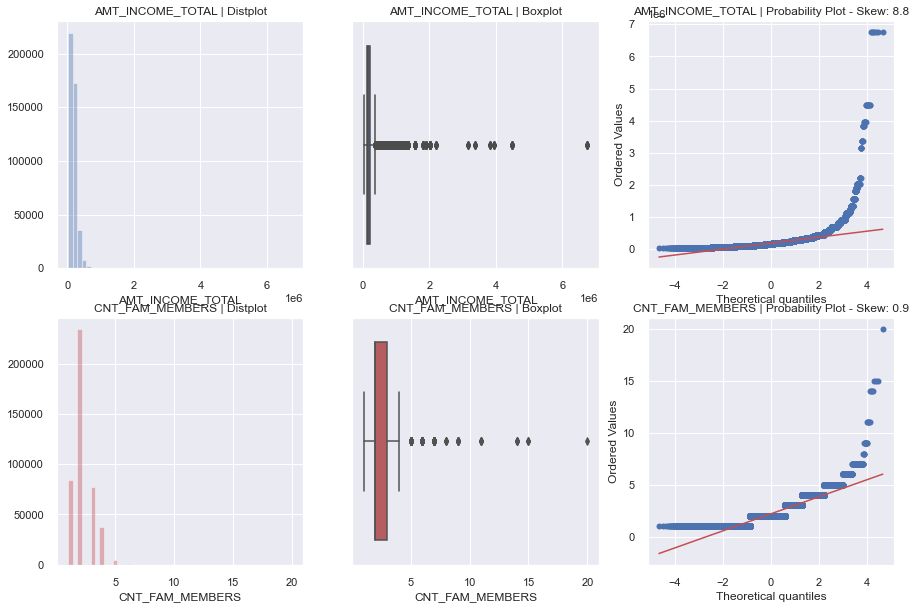

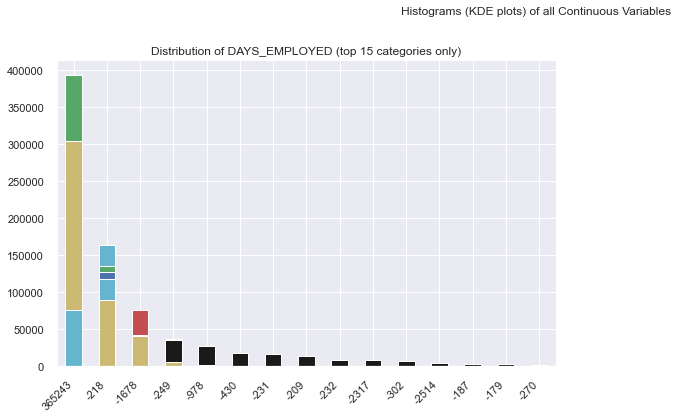

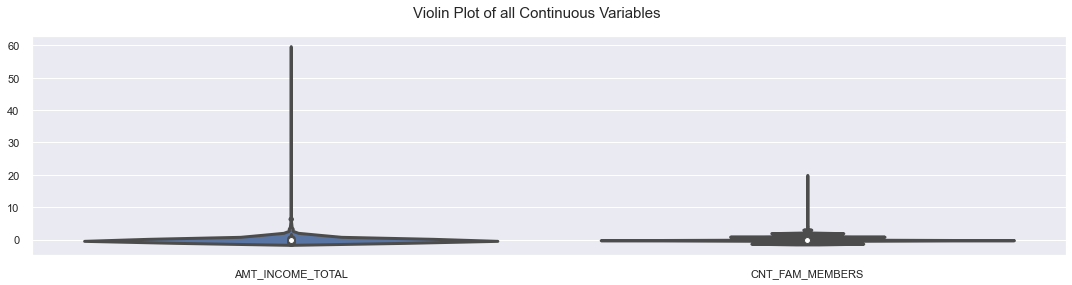

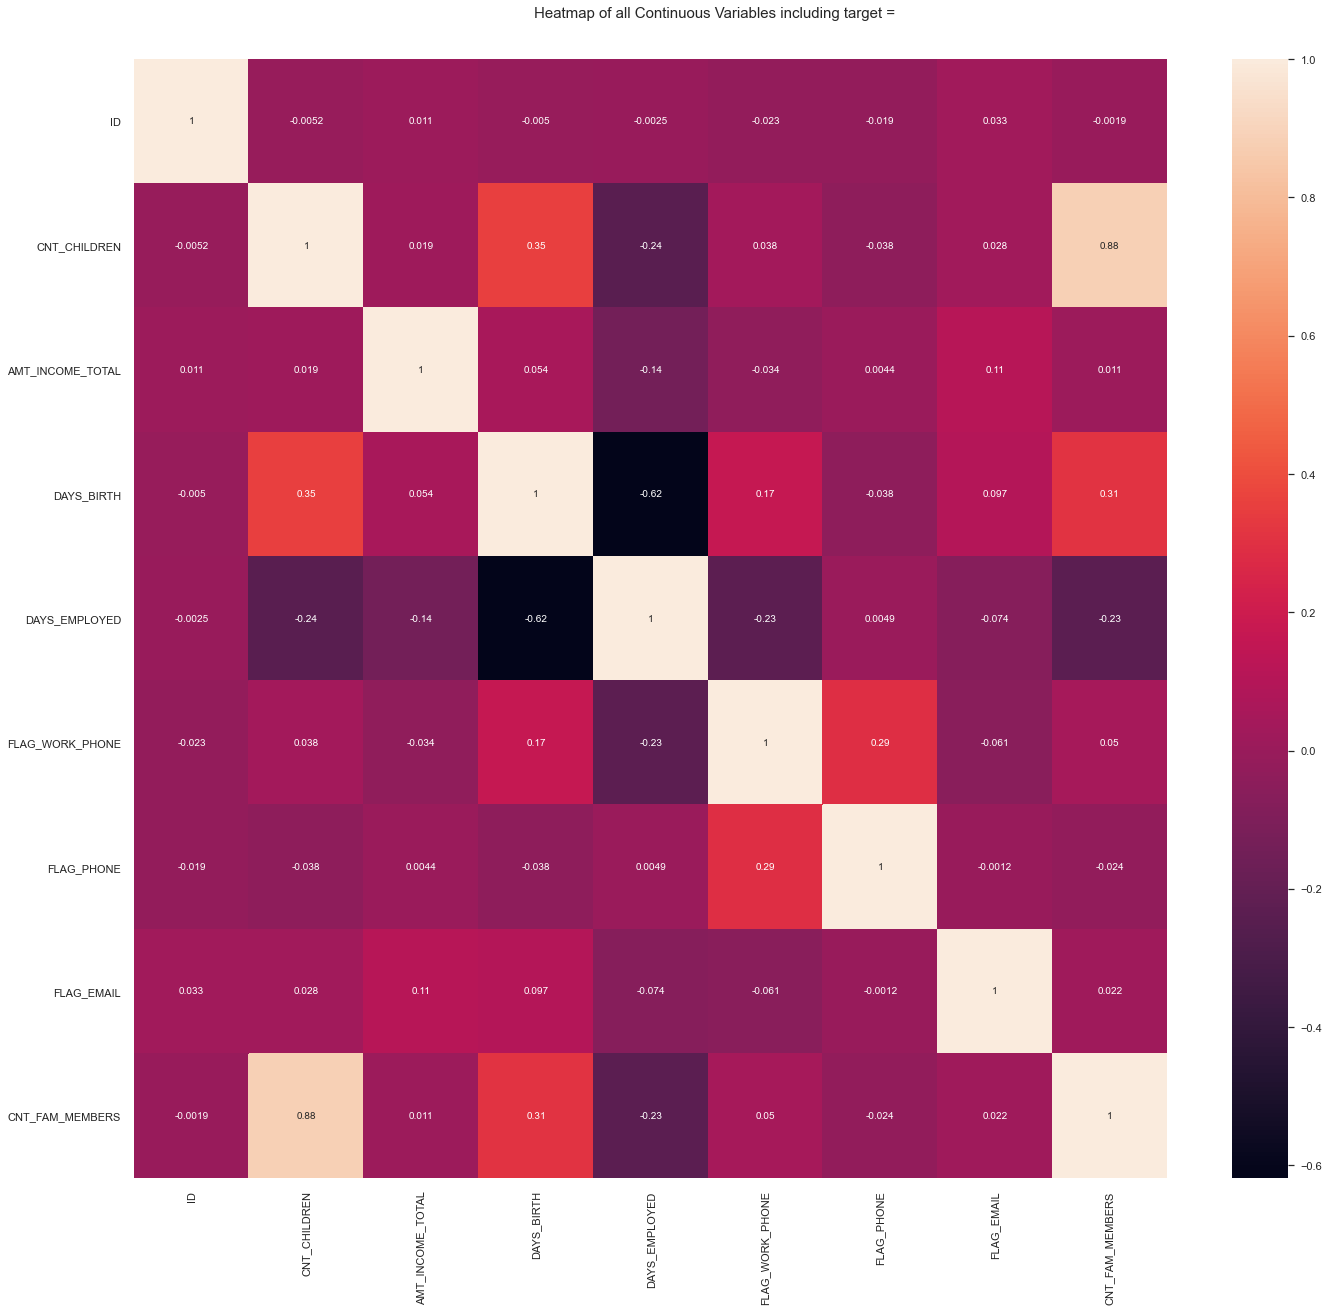

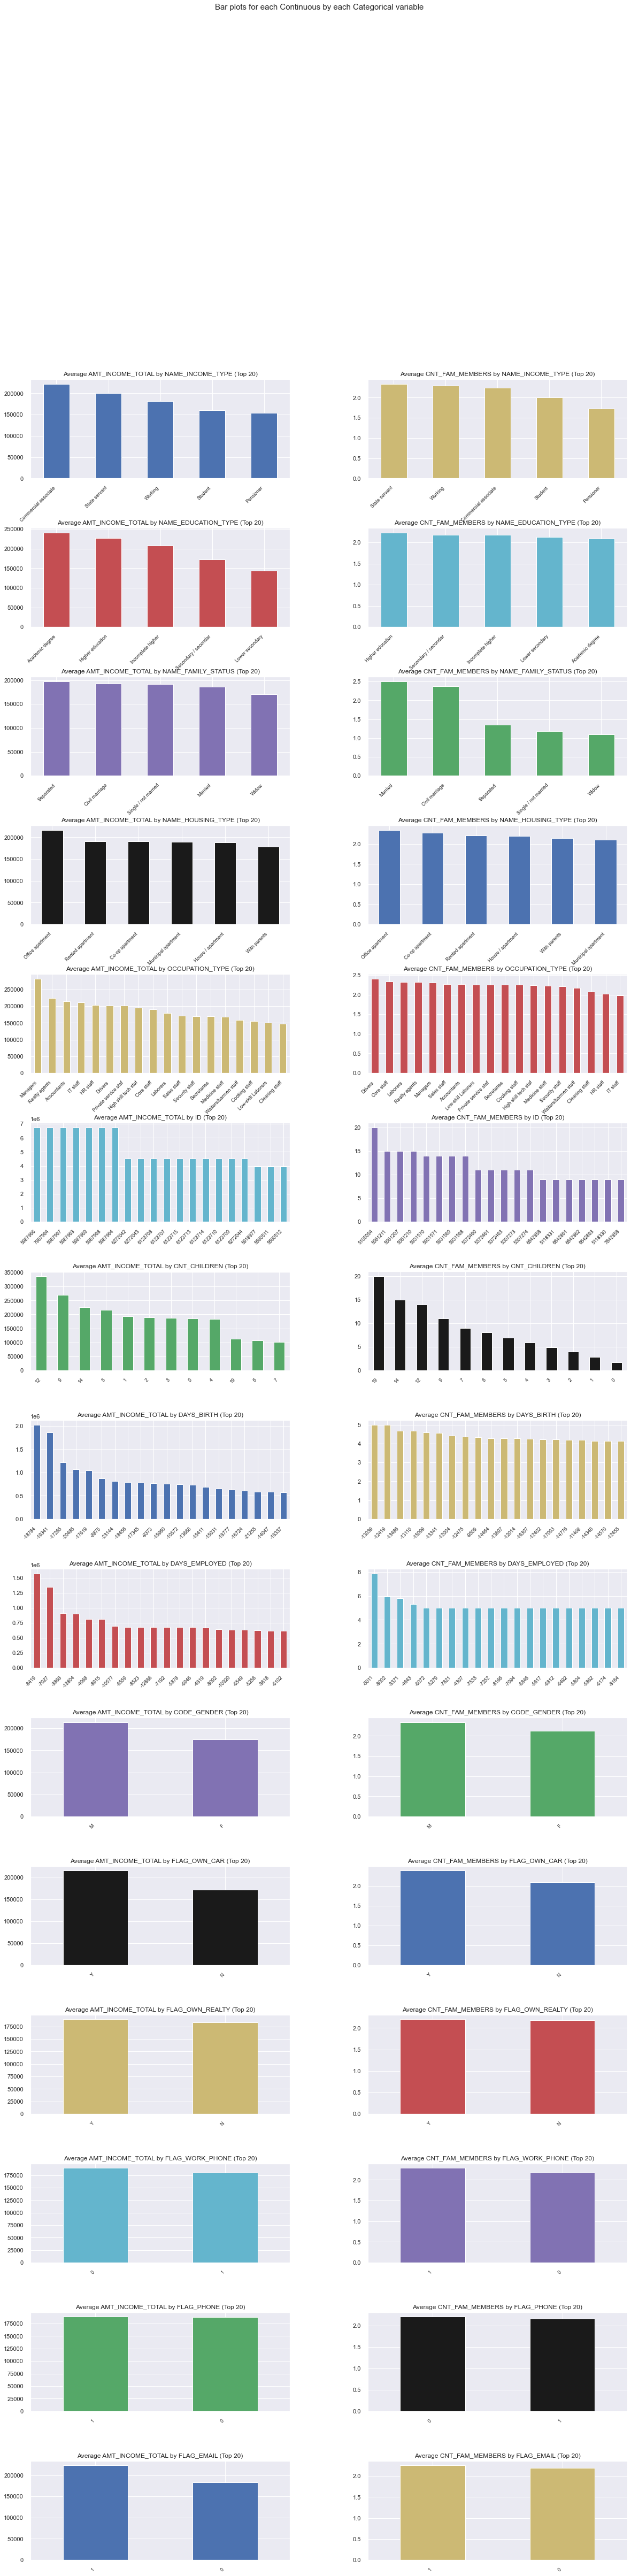

Time to run AutoViz (in seconds) = 27.914

 ###################### VISUALIZATION Completed ########################


In [26]:
AV = AutoViz_Class()

filename = 'application_record.csv'
sep = ','
dft = AV.AutoViz(filename, 
                 sep, 
                 depVar='', 
                 dfte=None,
                 header=0, 
                 verbose=0, 
                 lowess=False, 
                 chart_format='svg', 
                 max_rows_analyzed=5000000, 
                 max_cols_analyzed=50)

## Feature Engineering

In [27]:
# find all users' account open month.
begin_month=pd.DataFrame(crData.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
begin_month=begin_month.rename(columns={'MONTHS_BALANCE':'begin_month'}) 
new_data=pd.merge(data,begin_month,how="left",on="ID") #merge to record data

In [28]:
crData['dep_value'] = None
crData['dep_value'][crData['STATUS'] =='2']='Yes' 
crData['dep_value'][crData['STATUS'] =='3']='Yes' 
crData['dep_value'][crData['STATUS'] =='4']='Yes' 
crData['dep_value'][crData['STATUS'] =='5']='Yes'

In [29]:
cpunt=crData.groupby('ID').count()
cpunt['dep_value'][cpunt['dep_value'] > 0]='Yes' 
cpunt['dep_value'][cpunt['dep_value'] == 0]='No' 
cpunt = cpunt[['dep_value']]
new_data=pd.merge(new_data,cpunt,how='inner',on='ID')
new_data['target']=new_data['dep_value']
new_data.loc[new_data['target']=='Yes','target']=1
new_data.loc[new_data['target']=='No','target']=0

In [30]:
print(cpunt['dep_value'].value_counts())
cpunt['dep_value'].value_counts(normalize=True)

No     45318
Yes      667
Name: dep_value, dtype: int64


No     0.985495
Yes    0.014505
Name: dep_value, dtype: float64

## Features

### --rename

In [31]:
new_data.rename(columns={'CODE_GENDER':'Gender',
                         'FLAG_OWN_CAR':'Car',
                         'FLAG_OWN_REALTY':'Reality',
                         'CNT_CHILDREN':'ChldNo',
                         'AMT_INCOME_TOTAL':'inc',
                         'NAME_EDUCATION_TYPE':'edutp',
                         'NAME_FAMILY_STATUS':'famtp',
                         'NAME_HOUSING_TYPE':'houtp',
                         'FLAG_EMAIL':'email',
                         'NAME_INCOME_TYPE':'inctp',
                         'FLAG_WORK_PHONE':'wkphone',
                         'FLAG_PHONE':'phone',
                         'CNT_FAM_MEMBERS':'famsize',
                         'OCCUPATION_TYPE':'occyp'
                        }, inplace=True)

In [32]:
new_data.dropna()
new_data = new_data.mask(new_data == 'NULL').dropna()

In [33]:
ivtable=pd.DataFrame(new_data.columns,columns=['variable'])
ivtable['IV']=None
namelist = ['FLAG_MOBIL','begin_month','dep_value','target','ID']

for i in namelist:
    ivtable.drop(ivtable[ivtable['variable'] == i].index, inplace=True)

### Binary Features

In [34]:
# Calculate information value
def calc_iv(df, feature, target, pr=False):
    lst = []
    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    
    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()
    print('This variable\'s IV is:',iv)
    print(df[feature].value_counts())
    return iv, data

In [35]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [36]:
def get_category(df, col, binsnum, labels, qcut = False):
    if qcut:
        localdf = pd.qcut(df[col], q = binsnum, labels = labels) # quantile cut
    else:
        localdf = pd.cut(df[col], bins = binsnum, labels = labels) # equal-length cut
        
    localdf = pd.DataFrame(localdf)
    name = 'gp' + '_' + col
    localdf[name] = localdf[col]
    df = df.join(localdf[name])
    df[name] = df[name].astype(object)
    return df

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### --Gender

In [38]:
new_data['Gender'] = new_data['Gender'].replace(['F','M'],[0,1])
print(new_data['Gender'].value_counts())
iv, data = calc_iv(new_data,'Gender','target')
ivtable.loc[ivtable['variable']=='Gender','IV']=iv
data.head()

0    15630
1     9504
Name: Gender, dtype: int64
This variable's IV is: 0.02520350452745081
0    15630
1     9504
Name: Gender, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Gender,0,15630,15400,230,0.621867,0.014715,0.623179,0.545024,0.134005,0.010473
1,Gender,1,9504,9312,192,0.378133,0.020202,0.376821,0.454976,-0.188475,0.014730


### --Having a Car or Not

In [39]:
new_data['Car'] = new_data['Car'].replace(['N','Y'],[0,1])
print(new_data['Car'].value_counts())
iv, data=calc_iv(new_data,'Car','target')
ivtable.loc[ivtable['variable']=='Car','IV']=iv
data.head()

0    14618
1    10516
Name: Car, dtype: int64
This variable's IV is: 4.54248124999671e-06
0    14618
1    10516
Name: Car, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Car,0,14618,14373,245,0.581603,0.016760,0.58162,0.580569,0.00181,0.000002
1,Car,1,10516,10339,177,0.418397,0.016831,0.41838,0.419431,-0.00251,0.000003


### --Having House Reality or Not

In [40]:
new_data['Reality'] = new_data['Reality'].replace(['N','Y'],[0,1])
print(new_data['Reality'].value_counts())
iv, data=calc_iv(new_data,'Reality','target')
ivtable.loc[ivtable['variable']=='Reality','IV']=iv
data.head()

1    16461
0     8673
Name: Reality, dtype: int64
This variable's IV is: 0.02744070350168343
1    16461
0     8673
Name: Reality, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Reality,0,8673,8494,179,0.34507,0.020639,0.34372,0.424171,-0.210309,0.016920
1,Reality,1,16461,16218,243,0.65493,0.014762,0.65628,0.575829,0.130777,0.010521


### --Having a phone or not

In [41]:
new_data['phone']=new_data['phone'].astype(str)
print(new_data['phone'].value_counts(normalize=True,sort=False))
new_data.drop(new_data[new_data['phone'] == 'nan' ].index, inplace=True)
iv, data=calc_iv(new_data,'phone','target')
ivtable.loc[ivtable['variable']=='phone','IV']=iv
data.head()

1    0.292791
0    0.707209
Name: phone, dtype: float64
This variable's IV is: 0.0005480495762639297
0    17775
1     7359
Name: phone, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,phone,0,17775,17481,294,0.707209,0.016540,0.707389,0.696682,0.015251,0.000163
1,phone,1,7359,7231,128,0.292791,0.017394,0.292611,0.303318,-0.035937,0.000385


### --Having an email or no

In [42]:
print(new_data['email'].value_counts(normalize=True,sort=False))
new_data['email']=new_data['email'].astype(str)
iv, data=calc_iv(new_data,'email','target')
ivtable.loc[ivtable['variable']=='email','IV']=iv
data.head()

0    0.89934
1    0.10066
Name: email, dtype: float64
This variable's IV is: 1.7343581493999816e-05
0    22604
1     2530
Name: email, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,email,0,22604,22225,379,0.89934,0.016767,0.899361,0.898104,0.001398,0.000002
1,email,1,2530,2487,43,0.10066,0.016996,0.100639,0.101896,-0.012407,0.000016


### --Having a Work Phone or not

In [43]:
new_data['wkphone']=new_data['wkphone'].astype(str)
iv, data = calc_iv(new_data,'wkphone','target')
new_data.drop(new_data[new_data['wkphone'] == 'nan' ].index, inplace=True)
ivtable.loc[ivtable['variable']=='wkphone','IV']=iv
data.head()

This variable's IV is: 0.002042429795148461
0    18252
1     6882
Name: wkphone, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,wkphone,0,18252,17954,298,0.726188,0.016327,0.72653,0.706161,0.028436,0.000579
1,wkphone,1,6882,6758,124,0.273812,0.018018,0.27347,0.293839,-0.071838,0.001463


## Continuous Variables

### --Children Numbers

In [44]:
new_data.loc[new_data['ChldNo'] >= 2,'ChldNo']='2More'
print(new_data['ChldNo'].value_counts(sort=False))

0        15908
1         6118
2More     3108
Name: ChldNo, dtype: int64


In [45]:
iv, data=calc_iv(new_data,'ChldNo','target')
ivtable.loc[ivtable['variable']=='ChldNo','IV']=iv
data.head()

This variable's IV is: 0.0011214542503301935
0        15908
1         6118
2More     3108
Name: ChldNo, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,ChldNo,0,15908,15635,273,0.632928,0.017161,0.632689,0.646919,-0.022243,0.000317
1,ChldNo,1,6118,6021,97,0.243415,0.015855,0.243647,0.229858,0.058259,0.000803
2,ChldNo,2More,3108,3056,52,0.123657,0.016731,0.123665,0.123223,0.003580,0.000002


In [46]:
new_data = convert_dummy(new_data,'ChldNo')

### --Annual income

(2.544, 18.18]      14663
(18.18, 33.66]       8464
(33.66, 49.14]       1637
(49.14, 64.62]        175
(64.62, 80.1]         124
(80.1, 95.58]          50
(95.58, 111.06]         4
(111.06, 126.54]        3
(126.54, 142.02]        6
(142.02, 157.5]         8
Name: inc, dtype: int64


<AxesSubplot:ylabel='Frequency'>

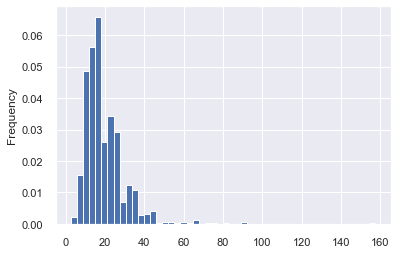

In [47]:
new_data['inc']=new_data['inc'].astype(object)
new_data['inc'] = new_data['inc']/10000 
print(new_data['inc'].value_counts(bins=10,sort=False))
new_data['inc'].plot(kind='hist',bins=50,density=True)

In [48]:
new_data = get_category(new_data,'inc', 3, ["low","medium", "high"], qcut = True)
iv, data = calc_iv(new_data,'gp_inc','target')
ivtable.loc[ivtable['variable']=='inc','IV']=iv
data.head()

This variable's IV is: 0.0024219962221596752
low       8996
high      8244
medium    7894
Name: gp_inc, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gp_inc,high,8244,8096,148,0.328002,0.017952,0.327614,0.350711,-0.068126,0.001573
1,gp_inc,low,8996,8849,147,0.357922,0.016341,0.358085,0.348341,0.027588,0.000269
2,gp_inc,medium,7894,7767,127,0.314077,0.016088,0.314301,0.300948,0.043413,0.000580


In [49]:
new_data = convert_dummy(new_data,'gp_inc')

### --Age

(19.951999999999998, 24.7]    0.025066
(24.7, 29.4]                  0.134280
(29.4, 34.1]                  0.169770
(34.1, 38.8]                  0.140805
(38.8, 43.5]                  0.173072
(43.5, 48.2]                  0.141880
(48.2, 52.9]                  0.099069
(52.9, 57.6]                  0.076550
(57.6, 62.3]                  0.032585
(62.3, 67.0]                  0.006923
Name: Age, dtype: float64


<AxesSubplot:ylabel='Frequency'>

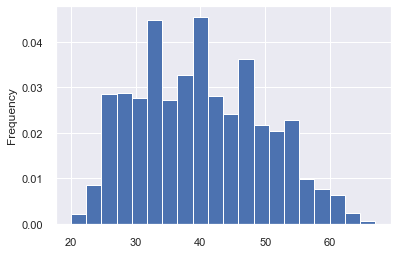

In [50]:
new_data['Age']=-(new_data['DAYS_BIRTH'])//365	
print(new_data['Age'].value_counts(bins=10,normalize=True,sort=False))
new_data['Age'].plot(kind='hist',bins=20,density=True)

In [51]:
new_data = get_category(new_data,'Age',5, ["lowest","low","medium","high","highest"])
iv, data = calc_iv(new_data,'gp_Age','target')
ivtable.loc[ivtable['variable']=='DAYS_BIRTH','IV'] = iv
data.head()

This variable's IV is: 0.06593513858884348
medium     7916
low        7806
high       4414
lowest     4005
highest     993
Name: gp_Age, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gp_Age,high,4414,4323,91,0.175619,0.020616,0.174935,0.215640,-0.209194,0.008515
1,gp_Age,highest,993,989,4,0.039508,0.004028,0.040021,0.009479,1.440361,0.043992
2,gp_Age,low,7806,7686,120,0.310575,0.015373,0.311023,0.284360,0.089625,0.002390
3,gp_Age,lowest,4005,3921,84,0.159346,0.020974,0.158668,0.199052,-0.226754,0.009157
4,gp_Age,medium,7916,7793,123,0.314952,0.015538,0.315353,0.291469,0.078758,0.001881


In [52]:
new_data = convert_dummy(new_data,'gp_Age')

### --Working Years

<AxesSubplot:ylabel='Frequency'>

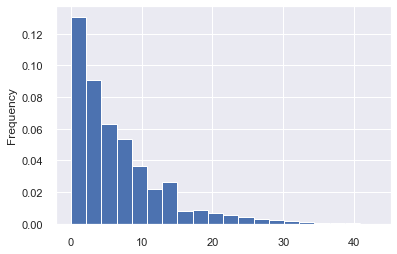

In [53]:
new_data['worktm']=-(new_data['DAYS_EMPLOYED'])//365	
new_data[new_data['worktm']<0] = np.nan # replace by na
new_data['DAYS_EMPLOYED']
new_data['worktm'].fillna(new_data['worktm'].mean(),inplace=True) #replace na by mean
new_data['worktm'].plot(kind='hist',bins=20,density=True)

In [54]:
new_data = get_category(new_data,'worktm',5, ["lowest","low","medium","high","highest"])
iv, data=calc_iv(new_data,'gp_worktm','target')
ivtable.loc[ivtable['variable']=='DAYS_EMPLOYED','IV']=iv
data.head()

This variable's IV is: 0.04022152230816303
lowest     18254
low         4987
medium      1378
high         425
highest       90
Name: gp_worktm, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gp_worktm,high,425,423,2,0.016909,0.004706,0.017117,0.004739,1.284186,0.015895
1,gp_worktm,highest,90,90,0,0.003581,0.000000,0.003642,0.000000,0.000000,0.000000
2,gp_worktm,low,4987,4921,66,0.198416,0.013234,0.199134,0.156398,0.241573,0.010324
3,gp_worktm,lowest,18254,17916,338,0.726267,0.018516,0.724992,0.800948,-0.099635,0.007568
4,gp_worktm,medium,1378,1362,16,0.054826,0.011611,0.055115,0.037915,0.374082,0.006434


In [55]:
new_data = convert_dummy(new_data,'gp_worktm')

### --Family Size

In [56]:
new_data['famsize'].value_counts(sort=False)

2.0     12697
1.0      4263
3.0      5216
4.0      2576
6.0        51
9.0         2
5.0       307
7.0        18
20.0        1
15.0        3
Name: famsize, dtype: int64

In [57]:
new_data['famsize']=new_data['famsize'].astype(int)
new_data['famsizegp']=new_data['famsize']
new_data['famsizegp']=new_data['famsizegp'].astype(object)
new_data.loc[new_data['famsizegp']>=3,'famsizegp']='3more'
iv, data=calc_iv(new_data,'famsizegp','target')
ivtable.loc[ivtable['variable']=='famsize','IV']=iv
data.head()

This variable's IV is: 0.006156138510778323
2        12697
3more     8174
1         4263
Name: famsizegp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,famsizegp,1,4263,4179,84,0.169611,0.019704,0.169108,0.199052,-0.163028,0.004882
1,famsizegp,2,12697,12489,208,0.505172,0.016382,0.505382,0.492891,0.025027,0.000313
2,famsizegp,3more,8174,8044,130,0.325217,0.015904,0.325510,0.308057,0.055108,0.000962


In [58]:
new_data = convert_dummy(new_data,'famsizegp')

## Categorical Features

### --Income Type

In [59]:
print(new_data['inctp'].value_counts(sort=False))
print(new_data['inctp'].value_counts(normalize=True,sort=False))
new_data.loc[new_data['inctp']=='Pensioner','inctp']='State servant'
new_data.loc[new_data['inctp']=='Student','inctp']='State servant'
iv, data=calc_iv(new_data,'inctp','target')
ivtable.loc[ivtable['variable']=='inctp','IV']=iv
data.head()

Commercial associate     7052
State servant            2437
Pensioner                  13
Working                 15622
Student                    10
Name: inctp, dtype: int64
Commercial associate    0.280576
State servant           0.096960
Pensioner               0.000517
Working                 0.621549
Student                 0.000398
Name: inctp, dtype: float64
This variable's IV is: 5.159303327851404e-05
Working                 15622
Commercial associate     7052
State servant            2460
Name: inctp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,inctp,Commercial associate,7052,6933,119,0.280576,0.016875,0.280552,0.281991,-0.005115,0.000007
1,inctp,State servant,2460,2418,42,0.097875,0.017073,0.097847,0.099526,-0.017013,0.000029
2,inctp,Working,15622,15361,261,0.621549,0.016707,0.621601,0.618483,0.005028,0.000016


In [60]:
new_data = convert_dummy(new_data,'inctp')

### --Occupation Type

In [61]:
new_data.isnull().sum()

ID                            0
Gender                        0
Car                           0
Reality                       0
inc                           0
edutp                         0
famtp                         0
houtp                         0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
FLAG_MOBIL                    0
wkphone                       0
phone                         0
email                         0
occyp                         0
famsize                       0
begin_month                   0
dep_value                     0
target                        0
ChldNo_1                      0
ChldNo_2More                  0
gp_inc_high                   0
gp_inc_medium                 0
Age                           0
gp_Age_high                   0
gp_Age_highest                0
gp_Age_low                    0
gp_Age_lowest                 0
worktm                        0
gp_worktm_high                0
gp_worktm_highest             0
gp_workt

In [62]:
new_data.shape

(25134, 37)

In [63]:
new_data.loc[(new_data['occyp']=='Cleaning staff') | (new_data['occyp']=='Cooking staff') | (new_data['occyp']=='Drivers') | (new_data['occyp']=='Laborers') | (new_data['occyp']=='Low-skill Laborers') | (new_data['occyp']=='Security staff') | (new_data['occyp']=='Waiters/barmen staff'),'occyp']='Laborwk'
new_data.loc[(new_data['occyp']=='Accountants') | (new_data['occyp']=='Core staff') | (new_data['occyp']=='HR staff') | (new_data['occyp']=='Medicine staff') | (new_data['occyp']=='Private service staff') | (new_data['occyp']=='Realty agents') | (new_data['occyp']=='Sales staff') | (new_data['occyp']=='Secretaries'),'occyp']='officewk'
new_data.loc[(new_data['occyp']=='Managers') | (new_data['occyp']=='High skill tech staff') | (new_data['occyp']=='IT staff'),'occyp']='hightecwk'
print(new_data['occyp'].value_counts())
iv, data=calc_iv(new_data,'occyp','target')
ivtable.loc[ivtable['variable']=='occyp','IV']=iv
data.head()   

Laborwk      10496
officewk     10183
hightecwk     4455
Name: occyp, dtype: int64
This variable's IV is: 0.004820472062853304
Laborwk      10496
officewk     10183
hightecwk     4455
Name: occyp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,occyp,Laborwk,10496,10311,185,0.417602,0.017626,0.417247,0.438389,-0.049428,0.001045
1,occyp,hightecwk,4455,4375,80,0.177250,0.017957,0.177039,0.189573,-0.068404,0.000857
2,occyp,officewk,10183,10026,157,0.405148,0.015418,0.405714,0.372038,0.086652,0.002918


In [64]:
new_data = convert_dummy(new_data,'occyp')

### --House Type

In [65]:
iv, data=calc_iv(new_data,'houtp','target')
ivtable.loc[ivtable['variable']=='houtp','IV']=iv
data.head()

This variable's IV is: 0.0073275026880227365
House / apartment      22102
With parents            1430
Municipal apartment      812
Rented apartment         439
Office apartment         199
Co-op apartment          152
Name: houtp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,houtp,Co-op apartment,152,149,3,0.006048,0.019737,0.006029,0.007109,-0.164705,0.000178
1,houtp,House / apartment,22102,21738,364,0.879367,0.016469,0.879654,0.862559,0.019624,0.000335
2,houtp,Municipal apartment,812,793,19,0.032307,0.023399,0.032090,0.045024,-0.338655,0.004380
3,houtp,Office apartment,199,194,5,0.007918,0.025126,0.007850,0.011848,-0.411619,0.001646
4,houtp,Rented apartment,439,433,6,0.017466,0.013667,0.017522,0.014218,0.208939,0.000690


In [66]:
new_data = convert_dummy(new_data,'houtp')

### --Education

In [67]:
new_data.loc[new_data['edutp']=='Academic degree','edutp']='Higher education'
iv, data=calc_iv(new_data,'edutp','target')
ivtable.loc[ivtable['variable']=='edutp','IV']=iv
data.head()

This variable's IV is: 0.010361794017679489
Secondary / secondary special    16808
Higher education                  7146
Incomplete higher                  993
Lower secondary                    187
Name: edutp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,edutp,Higher education,7146,7018,128,0.284316,0.017912,0.283992,0.303318,-0.065836,0.001272
1,edutp,Incomplete higher,993,972,21,0.039508,0.021148,0.039333,0.049763,-0.235206,0.002453
2,edutp,Lower secondary,187,181,6,0.007440,0.032086,0.007324,0.014218,-0.663301,0.004573
3,edutp,Secondary / secondary special,16808,16541,267,0.668736,0.015885,0.669351,0.632701,0.056310,0.002064


In [68]:
new_data = convert_dummy(new_data,'edutp')

### --Marriage Condition

In [69]:
new_data['famtp'].value_counts(normalize=True,sort=False)

Civil marriage          0.084865
Married                 0.696626
Widow                   0.023076
Separated               0.058367
Single / not married    0.137065
Name: famtp, dtype: float64

In [70]:
iv, data=calc_iv(new_data,'famtp','target')
ivtable.loc[ivtable['variable']=='famtp','IV']=iv
data.head()

This variable's IV is: 0.043137115423127946
Married                 17509
Single / not married     3445
Civil marriage           2133
Separated                1467
Widow                     580
Name: famtp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,famtp,Civil marriage,2133,2101,32,0.084865,0.015002,0.085019,0.075829,0.114394,0.001051
1,famtp,Married,17509,17232,277,0.696626,0.015820,0.697313,0.656398,0.060467,0.002474
2,famtp,Separated,1467,1452,15,0.058367,0.010225,0.058757,0.035545,0.502608,0.011666
3,famtp,Single / not married,3445,3362,83,0.137065,0.024093,0.136047,0.196682,-0.368588,0.022349
4,famtp,Widow,580,565,15,0.023076,0.025862,0.022863,0.035545,-0.441263,0.005596


In [71]:
new_data = convert_dummy(new_data,'famtp')

## WoE: Weight of Evidence:

In [72]:
ivtable=ivtable.sort_values(by='IV',ascending=False)
ivtable.loc[ivtable['variable']=='DAYS_BIRTH','variable']='agegp'
ivtable.loc[ivtable['variable']=='DAYS_EMPLOYED','variable']='worktmgp'
ivtable.loc[ivtable['variable']=='inc','variable']='incgp'
ivtable

,variable,IV
10,agegp,0.0659351
8,famtp,0.0431371
11,worktmgp,0.0402215
3,Reality,0.0274407
1,Gender,0.0252035
7,edutp,0.0103618
9,houtp,0.0073275
17,famsize,0.00615614
16,occyp,0.00482047
5,incgp,0.002422


## Predictive Modeling

### --Split Dataset

In [73]:
new_data.columns

Index(['ID', 'Gender', 'Car', 'Reality', 'inc', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'wkphone', 'phone', 'email', 'famsize', 'begin_month',
       'dep_value', 'target', 'ChldNo_1', 'ChldNo_2More', 'gp_inc_high',
       'gp_inc_medium', 'Age', 'gp_Age_high', 'gp_Age_highest', 'gp_Age_low',
       'gp_Age_lowest', 'worktm', 'gp_worktm_high', 'gp_worktm_highest',
       'gp_worktm_low', 'gp_worktm_medium', 'famsizegp_1', 'famsizegp_3more',
       'inctp_Commercial associate', 'inctp_State servant', 'occyp_hightecwk',
       'occyp_officewk', 'houtp_Co-op apartment', 'houtp_Municipal apartment',
       'houtp_Office apartment', 'houtp_Rented apartment',
       'houtp_With parents', 'edutp_Higher education',
       'edutp_Incomplete higher', 'edutp_Lower secondary',
       'famtp_Civil marriage', 'famtp_Separated', 'famtp_Single / not married',
       'famtp_Widow'],
      dtype='object')

In [74]:
Y = new_data['target']
X = new_data[['Gender',
              'Reality',
              'ChldNo_1', 
              'ChldNo_2More','wkphone',
              'gp_Age_high', 'gp_Age_highest', 'gp_Age_low',
       'gp_Age_lowest','gp_worktm_high', 'gp_worktm_highest',
       'gp_worktm_low', 'gp_worktm_medium','occyp_hightecwk', 
              'occyp_officewk','famsizegp_1', 'famsizegp_3more',
       'houtp_Co-op apartment', 'houtp_Municipal apartment',
       'houtp_Office apartment', 'houtp_Rented apartment',
       'houtp_With parents','edutp_Higher education',
       'edutp_Incomplete higher', 'edutp_Lower secondary','famtp_Civil marriage',
       'famtp_Separated','famtp_Single / not married','famtp_Widow']]

In [75]:
Y = Y.astype('int')
X_balance,Y_balance = SMOTE().fit_resample(X,Y)
X_balance = pd.DataFrame(X_balance, columns = X.columns)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_balance,
                                                    Y_balance, 
                                                    stratify=Y_balance, 
                                                    test_size=0.3,
                                                    random_state = 10086)

## Logistic Regression

Speed: 0:00:00.343410
Accuracy Score is 0.65167
      0     1
0  4207  3207
1  1958  5456
[[0.56743998 0.43256002]
 [0.26409496 0.73590504]]


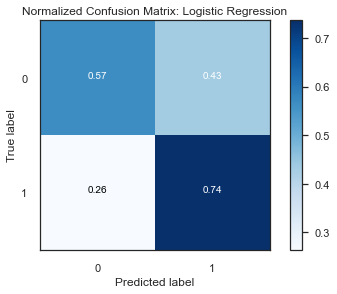

In [77]:
LRstart_time = datetime.now()

logRegModel = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='liblinear')
logRegModel.fit(X_train, y_train)
y_predict = logRegModel.predict(X_test)

print('Speed:', datetime.now() - LRstart_time)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Logistic Regression')

In [78]:
logRegImp = logRegModel.coef_[0]
logRegImp

array([ 0.05143053, -0.42087553,  0.82556315,  0.86940939, -0.13241573,
        0.30404265, -1.86902254, -0.07281612,  0.14439107, -3.94689019,
       -2.50619143, -1.0411284 , -1.87623715, -0.51882628, -0.41258236,
        0.67939272, -1.1463265 , -2.00489099, -0.89444914, -1.35462114,
       -3.51550148, -1.00365134, -0.13563697, -0.09754143, -1.76057582,
       -1.28793304, -1.95632179, -0.8145615 , -0.71949594])

In [79]:
for i,v in enumerate(logRegImp):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.05143
Feature: 1, Score: -0.42088
Feature: 2, Score: 0.82556
Feature: 3, Score: 0.86941
Feature: 4, Score: -0.13242
Feature: 5, Score: 0.30404
Feature: 6, Score: -1.86902
Feature: 7, Score: -0.07282
Feature: 8, Score: 0.14439
Feature: 9, Score: -3.94689
Feature: 10, Score: -2.50619
Feature: 11, Score: -1.04113
Feature: 12, Score: -1.87624
Feature: 13, Score: -0.51883
Feature: 14, Score: -0.41258
Feature: 15, Score: 0.67939
Feature: 16, Score: -1.14633
Feature: 17, Score: -2.00489
Feature: 18, Score: -0.89445
Feature: 19, Score: -1.35462
Feature: 20, Score: -3.51550
Feature: 21, Score: -1.00365
Feature: 22, Score: -0.13564
Feature: 23, Score: -0.09754
Feature: 24, Score: -1.76058
Feature: 25, Score: -1.28793
Feature: 26, Score: -1.95632
Feature: 27, Score: -0.81456
Feature: 28, Score: -0.71950


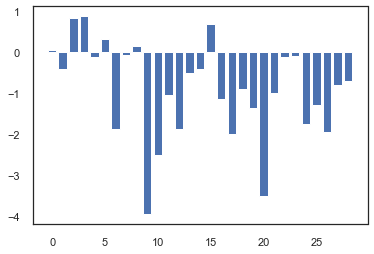

In [80]:
# plot feature importance
plt.bar([x for x in range(len(logRegImp))], logRegImp)
plt.show()

In [81]:
np.round(logRegModel.coef_, decimals=2) > 0

array([[ True, False,  True,  True, False,  True, False, False,  True,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False]])

In [82]:
new_data.columns

Index(['ID', 'Gender', 'Car', 'Reality', 'inc', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'wkphone', 'phone', 'email', 'famsize', 'begin_month',
       'dep_value', 'target', 'ChldNo_1', 'ChldNo_2More', 'gp_inc_high',
       'gp_inc_medium', 'Age', 'gp_Age_high', 'gp_Age_highest', 'gp_Age_low',
       'gp_Age_lowest', 'worktm', 'gp_worktm_high', 'gp_worktm_highest',
       'gp_worktm_low', 'gp_worktm_medium', 'famsizegp_1', 'famsizegp_3more',
       'inctp_Commercial associate', 'inctp_State servant', 'occyp_hightecwk',
       'occyp_officewk', 'houtp_Co-op apartment', 'houtp_Municipal apartment',
       'houtp_Office apartment', 'houtp_Rented apartment',
       'houtp_With parents', 'edutp_Higher education',
       'edutp_Incomplete higher', 'edutp_Lower secondary',
       'famtp_Civil marriage', 'famtp_Separated', 'famtp_Single / not married',
       'famtp_Widow'],
      dtype='object')

In [83]:
predictors = X_train
selector = RFE(logRegModel, n_features_to_select=1)
selector = selector.fit(predictors, y_train)

In [84]:
order = selector.ranking_
order

array([29, 22, 16, 15, 25, 23,  4, 28, 24,  1,  3, 11,  7, 20, 21, 18, 14,
        6, 13,  8,  2, 12, 26, 27,  5,  9, 10, 17, 19])

In [85]:
feature_ranks = []
for i in order:
    feature_ranks.append(f"{i}. {new_data.columns[i]}")
sorted(feature_ranks)

['1. Gender',
 '10. email',
 '11. famsize',
 '12. begin_month',
 '13. dep_value',
 '14. target',
 '15. ChldNo_1',
 '16. ChldNo_2More',
 '17. gp_inc_high',
 '18. gp_inc_medium',
 '19. Age',
 '2. Car',
 '20. gp_Age_high',
 '21. gp_Age_highest',
 '22. gp_Age_low',
 '23. gp_Age_lowest',
 '24. worktm',
 '25. gp_worktm_high',
 '26. gp_worktm_highest',
 '27. gp_worktm_low',
 '28. gp_worktm_medium',
 '29. famsizegp_1',
 '3. Reality',
 '4. inc',
 '5. DAYS_BIRTH',
 '6. DAYS_EMPLOYED',
 '7. FLAG_MOBIL',
 '8. wkphone',
 '9. phone']

In [86]:
LRresid = y_test - y_predict
LRsse = sum(LRresid**2)

LRk = 14828
LRAIC= 2*LRk - 2*np.log(LRsse)
print(LRAIC)

29638.900679236893


In [87]:
#MSE of the model:
mean_squared_error(y_test, y_predict)

0.3483274885352037

In [88]:
roc_auc_score(y_train, logRegModel.predict_proba(X_train)[:, 1])

0.713684637382366

In [89]:
# Top 10 RFE = Gender, Car, Reality, inc, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_MOBIL, wkphone, phone, email

## Decision Tree

Speed: 0:00:00.156218
Accuracy Score is 0.80152
      0     1
0  5705  1709
1  1234  6180
[[0.76949015 0.23050985]
 [0.16644187 0.83355813]]


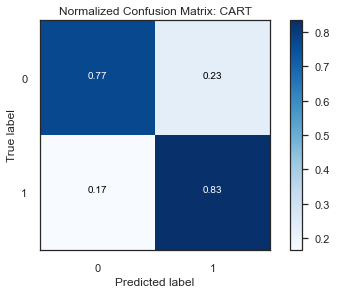

In [90]:
DTstart_time = datetime.now()

DTModel = DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024)
DTModel.fit(X_train, y_train)
y_predict = DTModel.predict(X_test)

print('Speed:', datetime.now() - DTstart_time)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: CART')

In [91]:
DTImp = DTModel.feature_importances_

In [92]:
DTcolumns = X_train.columns
DTcolumns

Index(['Gender', 'Reality', 'ChldNo_1', 'ChldNo_2More', 'wkphone',
       'gp_Age_high', 'gp_Age_highest', 'gp_Age_low', 'gp_Age_lowest',
       'gp_worktm_high', 'gp_worktm_highest', 'gp_worktm_low',
       'gp_worktm_medium', 'occyp_hightecwk', 'occyp_officewk', 'famsizegp_1',
       'famsizegp_3more', 'houtp_Co-op apartment', 'houtp_Municipal apartment',
       'houtp_Office apartment', 'houtp_Rented apartment',
       'houtp_With parents', 'edutp_Higher education',
       'edutp_Incomplete higher', 'edutp_Lower secondary',
       'famtp_Civil marriage', 'famtp_Separated', 'famtp_Single / not married',
       'famtp_Widow'],
      dtype='object')

In [93]:
df_cof_DT = pd.Series(DTImp,DTcolumns)
df_cof_DT

Gender                        0.076324
Reality                       0.153281
ChldNo_1                      0.039247
ChldNo_2More                  0.034185
wkphone                       0.143592
gp_Age_high                   0.036841
gp_Age_highest                0.030810
gp_Age_low                    0.069405
gp_Age_lowest                 0.029867
gp_worktm_high                0.002151
gp_worktm_highest             0.000000
gp_worktm_low                 0.047120
gp_worktm_medium              0.034939
occyp_hightecwk               0.035803
occyp_officewk                0.061108
famsizegp_1                   0.025884
famsizegp_3more               0.038110
houtp_Co-op apartment         0.000000
houtp_Municipal apartment     0.007841
houtp_Office apartment        0.000647
houtp_Rented apartment        0.009371
houtp_With parents            0.020692
edutp_Higher education        0.033140
edutp_Incomplete higher       0.015385
edutp_Lower secondary         0.000152
famtp_Civil marriage     

<AxesSubplot:>

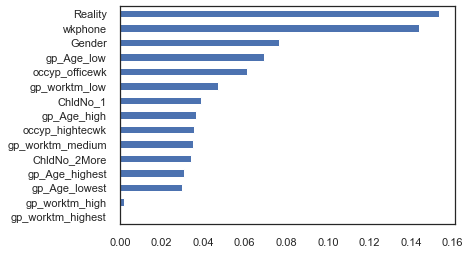

In [94]:
df_cof_DT.head(15).sort_values().plot.barh()

In [95]:
DTresid = y_test - y_predict
DTsse = sum(DTresid**2)

DTk = 14828
DTAIC= 2*DTk - 2*np.log(DTsse)
print(DTAIC)

29640.025630503533


In [96]:
#MSE of the model:
mean_squared_error(y_test, y_predict)

0.19847585648772592

In [97]:
roc_auc_score(y_train, DTModel.predict_proba(X_train)[:, 1])

0.9076635092525185

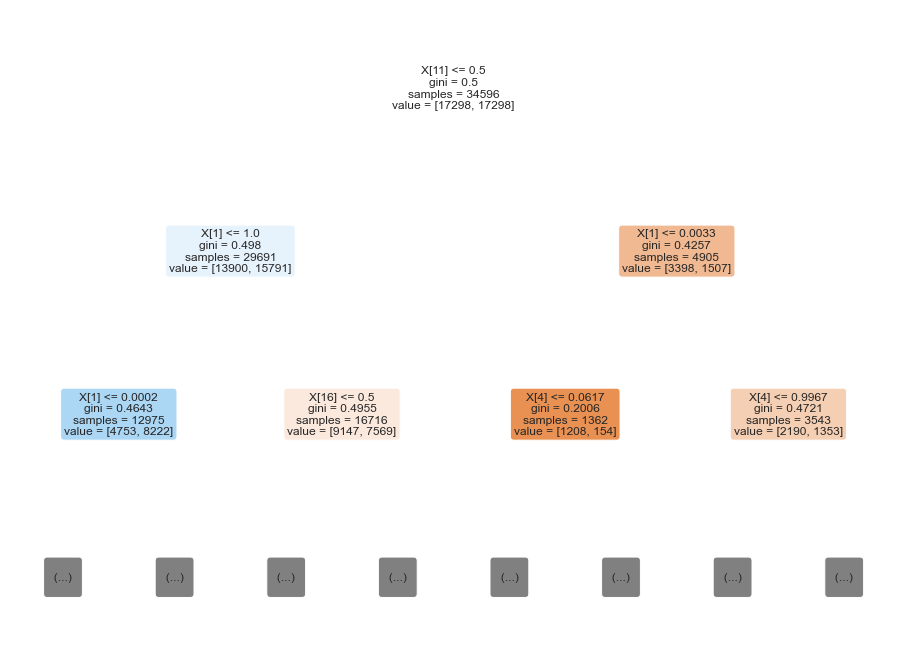

In [98]:
plt.figure(figsize=(16,12))
tree.plot_tree(DTModel, filled = True , precision = 4, rounded = True, max_depth=2, fontsize=12)
plt.show()

## Random Forest

Speed: 0:00:06.323309
Accuracy Score is 0.83248
      0     1
0  5978  1436
1  1048  6366
[[0.80631238 0.19368762]
 [0.14135419 0.85864581]]


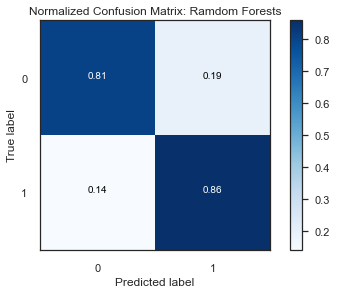

In [99]:
RFstart_time = datetime.now()

RFModel = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
RFModel.fit(X_train, y_train)
y_predict = RFModel.predict(X_test)

print('Speed:', datetime.now() - RFstart_time)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Ramdom Forests')

In [100]:
RFImp = RFModel.feature_importances_

In [101]:
RFcolumns = X_train.columns

In [102]:
df_cof_RF = pd.Series(RFImp,RFcolumns)
df_cof_RF

Gender                        0.051849
Reality                       0.159186
ChldNo_1                      0.036652
ChldNo_2More                  0.028442
wkphone                       0.098893
gp_Age_high                   0.046005
gp_Age_highest                0.048892
gp_Age_low                    0.051603
gp_Age_lowest                 0.036709
gp_worktm_high                0.015396
gp_worktm_highest             0.000265
gp_worktm_low                 0.077391
gp_worktm_medium              0.040883
occyp_hightecwk               0.026936
occyp_officewk                0.044758
famsizegp_1                   0.017366
famsizegp_3more               0.036292
houtp_Co-op apartment         0.000456
houtp_Municipal apartment     0.009762
houtp_Office apartment        0.000321
houtp_Rented apartment        0.013456
houtp_With parents            0.021835
edutp_Higher education        0.036684
edutp_Incomplete higher       0.016032
edutp_Lower secondary         0.000991
famtp_Civil marriage     

<AxesSubplot:>

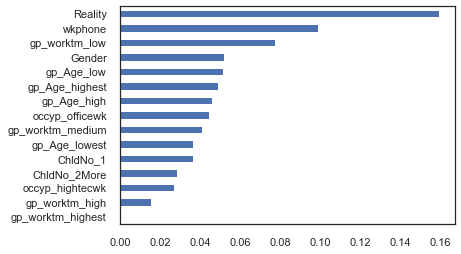

In [103]:
df_cof_RF.head(15).sort_values().plot.barh()

In [104]:
RFresid = y_test - y_predict
RFsse = sum(RFresid**2)

RFk = 14828
RFAIC= 2*RFk - 2*np.log(RFsse)
print(RFAIC)

29640.364749113895


In [105]:
#MSE of the model:
mean_squared_error(y_test, y_predict)

0.16752090639330997

In [106]:
roc_auc_score(y_train, RFModel.predict_proba(X_train)[:, 1])

0.9273284253323508

### Thank You!